## Principal of Data Science 

## Task 1. Markov Chains

Total machines are 200

The given states of the machines are as follows:
1) Idle
2) Working
3) Broken
4) In Repair
   
Based on the given probabilities

1) From Idle state : 5% remain Idle, 93% move to Working, 2% to Broken.
2) From Working state : 10% go Idle, 86% remain Working, 4% go to Broken.
3) From Broken state: 80% remain Broken, 20% go to Repair.
4) From In Repair state : 50% go Idle, 10% go Working, 40% remain in Repair.


(1) 
$$
A = \begin{bmatrix}
S_\text{Idle} \to\text{Idle} & S_\text{Working} \to \text{Idle} & S_\text{Broken} \to \text{Idle} & S_\text{Repair} \to \text{Idle} \\
S_\text{Idle} \to \text{Working} & S_\text{Working} \to \text{Working} & S_\text{Broken} \to \text{Working} & S_\text{Repair} \to \text{Working} \\
S_\text{Idle} \to \text{Broken} & S_\text{Working} \to \text{Broken} & S_\text{Broken} \to \text{Broken} & S_\text{Repair} \to \text{Broken} \\
S_\text{Idle} \to \text{Repair} & S_\text{Working} \to \text{Repair} & S_\text{Broken} \to \text{Repair} & S_\text{Repair} \to \text{Repair}
\end{bmatrix}
= \begin{bmatrix}
0.05 & 0.1 & 0 & 0.5 \\   % Idle transitions
0.93 & 0.86 & 0 & 0.1 \\  % Working transitions
0.02 & 0.04 & 0.8 & 0 \\  % Broken transitions
0 & 0 & 0.2 & 0.4       % Repair transitions
\end{bmatrix}
$$

In [132]:
# importing the essential libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

# the 4x4 transition matrix
A = np.array([
             [0.05, 0.1 , 0.0 ,  0.5 ],
             [0.93 ,0.86, 0.0,   0.1 ],
             [0.02, 0.04, 0.8,  0.0  ],
             [0.0  , 0.0,   0.2,  0.4 ]])


#### 2) 
since all the machines are initally working, [0,200,0,0] where 0 for idle, 200 for working, 0 for broken, 0 for repair state 

so we get matric for the inital state is
$$ 
S = \begin{bmatrix}
\text{Idle} \\
\text{Working} \\
\text{Broken} \\
\text{Repair}
\end{bmatrix}
= \begin{bmatrix}
0 \\
200 \\
0 \\
0
\end{bmatrix}
$$

So the according to the markov chain equestion we have,
$$
S_{t+1} = S_t \cdot A
$$

$$
\begin{bmatrix}
S_{\text{Idle}}(t+1) \\
S_{\text{Working}}(t+1) \\
S_{\text{Broken}}(t+1) \\
S_{\text{Repair}}(t+1)
\end{bmatrix}
=
\begin{bmatrix}
0.05 & 0.1 & 0.0 & 0.5 \\
0.93 & 0.86 & 0.0 & 0.1 \\
0.02 &  0.04 &  0.8 & 0.0 \\
0.0 & 0.0 & 0.2 & 0.4
\end{bmatrix}
\cdot
\begin{bmatrix}
S_{\text{Idle}}(t) \\
S_{\text{Working}}(t) \\
S_{\text{Broken}}(t) \\
S_{\text{Repair}}(t)
\end{bmatrix}
$$



In [304]:
def calc_state_hourly(A_, is_newpolicy):
    S = np.array([[0],[200],[0],[0]]) # S is for inital state
    hours = 0
    P=[]
    if is_newpolicy == 0: 
        P.append(S.flatten())
        for i in range(24):
            S = A_@S
            P.append(S.flatten())
    else:
        working_state = [S[1]]
        while S[1,0] >= 20:
            S = A_@S  # Apply the transition matrix
            working_state.append(S[1,0])  # Track number of working machines
            hours += 1
            
    if  is_newpolicy == 0:     
        return np.array(P)
    else:
         return hours

In [267]:
# Creatinig a DataFrame for Seaborn
states = ['Idle', 'Working', 'Broken', 'In Repair']
df = pd.DataFrame(calc_state_hourly(A,0), columns=states) # Creating data frame 
df['Hour'] = np.arange(25) 
print(df.head(10))

        Idle     Working     Broken  In Repair  Hour
0   0.000000  200.000000   0.000000   0.000000     0
1  20.000000  172.000000   8.000000   0.000000     1
2  18.200000  166.520000  13.680000   1.600000     2
3  18.362000  160.293200  17.968800   3.376000     3
4  18.635420  155.266412  21.154008   4.944160     4
5  18.930492  151.354471  23.506571   6.208466     5
6  19.186205  148.391049  25.238046   7.184700     6
7  19.390765  146.177943  26.509803   7.921489     7
8  19.548077  144.538591  27.442775   8.470556     8
9  19.666541  143.329956  28.126725   8.876778     9


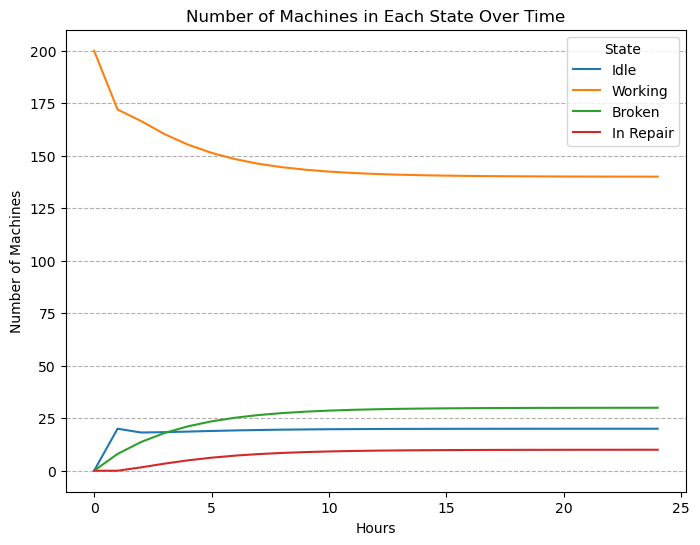

In [269]:
# Plotting
# Creating a simple line plot using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='Hour', y='Number of Machines', hue='State')
plt.xlabel('Hours')
plt.ylabel('Number of Machines')
plt.title('Number of Machines in Each State Over Time')
plt.grid(axis='y', linestyle='--')
plt.show()

##### Observation
By witnessing the above graph following observations can be made:
 - Working machine seems to be decreased after 5 hours of running and gained the steady 
 - Idle state's machines increased to where it reamins same through out the day
 - It can be seen that, broken machines increased after 5 hours and it reamins the same,
 



" Use numpy to find the eigenvectors of the transition matrix 𝐴 from part (1), and explain how one of these eigenvectors is related to the number of machines we would expect to see in each state in the “long-run steady state”."

Here is the expression for the eigenvector and eigenvalue 
$$
A \mathbf{v} = \lambda \mathbf{v}
$$
Long-run steady state of a markov chain is expressed by following mathametical expression  
$$
\pi A = \pi
$$
where:
- π is Steady state probability vector,
- A is transition matrix

By this expression, we get the same matrix as input after vector mutiplication, i.e. (λ = 1),


Additionally, the normalisation condition for the steady-state probabilities is:
$$
 \sum_{i=1}^{n} \pi_i = 1
$$


In [296]:
eigenvalues, eigenvectors = np.linalg.eig(A.T)
print(f'eigenvalues: \n ',eigenvalues)
print(f'eigenvector: \n', eigenvectors)

eigenvalues: 
  [-0.05659878  0.43426882  1.          0.73232996]
eigenvector: 
 [[ 0.67131544 -0.05353229  0.5        -0.17723716]
 [-0.08055032 -0.03241708  0.5        -0.14985146]
 [ 0.16751946  0.47885478  0.5         0.92138143]
 [-0.71748481 -0.87566062  0.5        -0.31174958]]


In [297]:
# getting index of value which is close to 1 
index = np.argmin(np.abs(eigenvalues-1))
print(index)

2


In [298]:
# getting the eigenvector which crosspond to 1
steady_state = eigenvectors[:,index]
print(f"steady state: \n {steady_state}")

steady state: 
 [0.5 0.5 0.5 0.5]


In [299]:
# getting the probabiltiy vector sum add upto 1 
steady_state = steady_state/steady_state.sum()
print("\n")
print(f"probability vector sum upto 1: \n {steady_state} \n")



probability vector sum upto 1: 
 [0.25 0.25 0.25 0.25] 



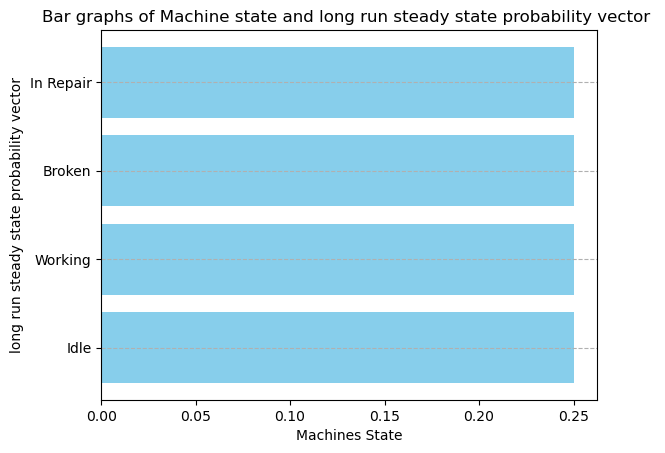

In [301]:
#ploting bar charts 
plt.figure()
plt.xlabel('Machines State')
plt.ylabel('long run steady state probability vector')
plt.title('Bar graphs of Machine state and long run steady state probability vector ')
plt.barh(states,steady_state,color='skyblue')
plt.grid(axis='y', linestyle='--')
plt.show()

By looking at the steady state probability vector I can conclude that,
 - 10% of machines remains idle
 - 70% of machines remains working
 - 15% of machines remains broken
 - 5% of machines are in repair 

### 3(a)
According to the new policy, the modified transition matrix A_new is 
$$
A_{\text{new}} = \begin{bmatrix}
1.0 & 0.00 & 0.00 & 0.00 \\
0.00 & 0.86 & 0.0 & 0.1 \\
0.00 & 0.04 & 0.80 & 0.0 \\
0.00 & 0.0 & 0.2 & 0.4
\end{bmatrix}
$$


In [302]:
A_new  = A.copy()
#Absorbing Markov Chains (p_kk=1 and P_jk=0 for j≠k)
#implimenting new policy as idle machine are switching off and ready to sold out. 
A_new[:,0]=0
A_new[0]=[1.0,0,0,0]
print(f'A_new: \n', A_new)

A_new: 
 [[1.   0.   0.   0.  ]
 [0.   0.86 0.   0.1 ]
 [0.   0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]]


In [305]:
hours = calc_state_hourly(A_new,1) # the function is created as they do the matrix multiplication here is_newpolicy is set to be 1
print(f"ET. of working machine until there are fewer than 20 functioning machines is : {hours} hrs")

ET. of working machine until there are fewer than 20 functioning machines is : 17 hrs


### 3(b)

In [306]:
# let I be the 3x3 identity matrix 
I = np.eye(3)
#let N be the transition matrix with k (idel row) deleted 
N = A_new.copy()[1:, 1:]

# calculating (𝐼 − 𝑁) as let results be IN
IN = (I-N)
# calculating the inverse of matrix IN results be IN_
IN_ = np.linalg.inv(IN)
time_expected = np.sum(IN_, axis=0)

states = states.copy()[1::] # removing idle from the states 
print(states)

['Working', 'Broken', 'In Repair']


In [307]:
for i, time in enumerate(time_expected):
    print(f"Calculated time for a machine to reach Idle from {states[i]} state: {time:.2f} hours")

Calculated time for a machine to reach Idle from Working state: 9.50 hours
Calculated time for a machine to reach Idle from Broken state: 8.25 hours
Calculated time for a machine to reach Idle from In Repair state: 3.25 hours


### 4 pending 

## Task 2 Eigenfaces

In [83]:
faces = sklearn.datasets.fetch_olivetti_faces()
Xall = faces.data.T
print(f'Shape of Xall is ', Xall.shape)
print(f"min {Xall.min()} and max {Xall.max()}")
Xsub = Xall[:,0:200]
print(f'Shape of Xsub is ', Xsub.shape)

Shape of Xall is  (4096, 400)
min 0.0 and max 1.0
Shape of Xsub is  (4096, 200)


### 1

In [84]:
# calculating the mean and reshaping it into 4096 × 1  matrix 
xbar = np.mean(Xsub,axis=1).reshape(4096,1)
print(xbar.shape)

(4096, 1)


In [85]:
# reshaping xbar in order to visualise 
mean_face= xbar.reshape(64,64) 

In [338]:
#visualise function
def visualise(face, title,is_show):
    plt.title(title)
    plt.imshow(face, cmap=plt.cm.gray, vmin=0, vmax=1)
    plt.axis("off")
    if is_show is True:
        plt.show()
    

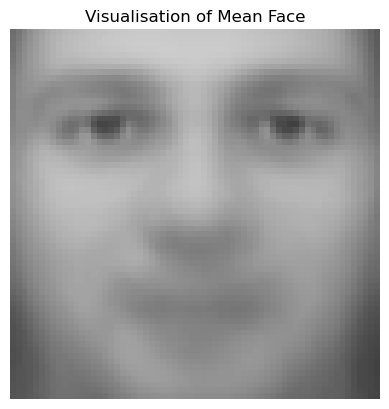

In [339]:
title = 'Visualisation of Mean Face'
visualise(mean_face,title,True)

In [88]:
# getting image stored at student id's index
student_id = 75
student_id_image = Xsub[:, student_id].reshape(64, 64)

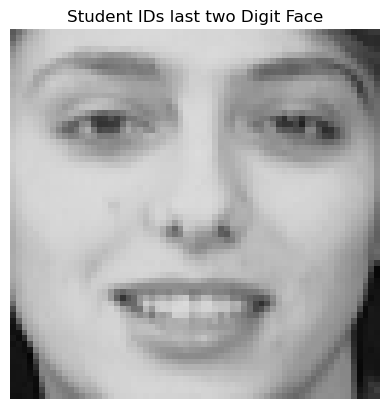

In [340]:
#calling visualise funciton
title = 'Student IDs last two Digit Face'
visualise(student_id_image,title,True)

### 2

In [90]:
# calculating the covarance of xSub as saving results on matrix C
C = np.cov(Xsub)
print(C.shape)


(4096, 4096)


In [91]:
# calculating eigenvalues and eigenvectors of matrix C
V,P = np.linalg.eigh(C)

In [92]:
# reversing the V,P matrix as suggested by the question
V = V[::-1]
P = P[:,::-1]

In [93]:
# verifying that 𝑃 is an orthogonal matrix
# let I be the identity matrix
I = np.eye(4096)
matrix_mul = np.dot(P.T,P)

In [94]:
# to see if P is orthogonal or not 
is_orthogonal  = np.allclose(matrix_mul,I)
print(is_orthogonal)

True


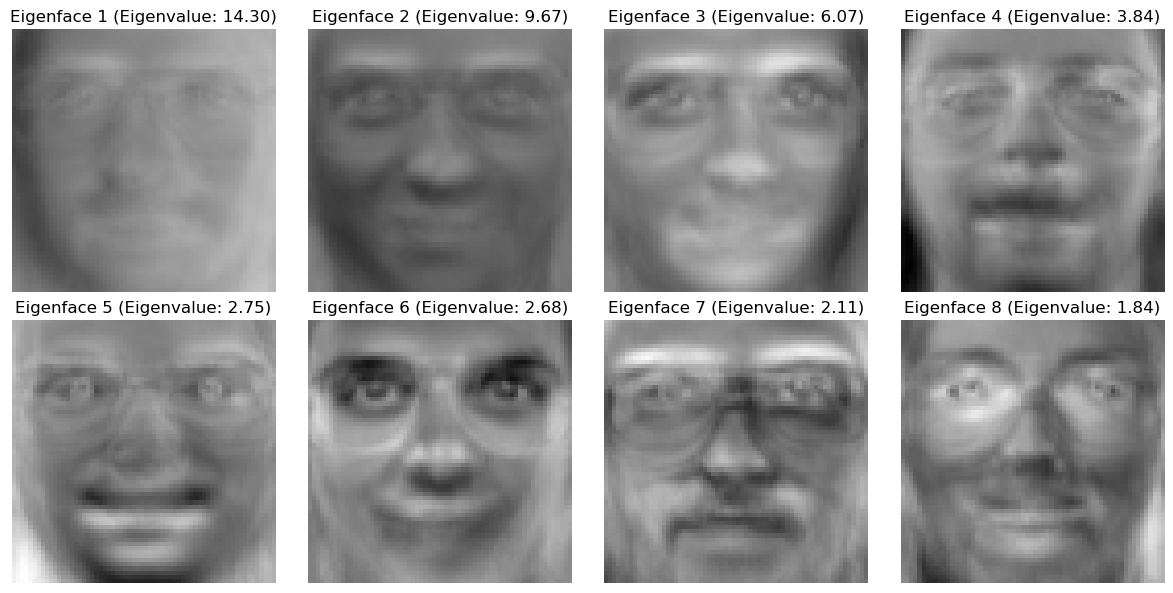

In [353]:
# Visualise the top 8 eigenfaces
# Select the top 8 eigenfaces
top_8_eigenfaces = P[:, :8]

plt.figure(figsize=(12, 6))

# Normalize the eigenfaces for better visualization
eigenfaces_normalized_image = (top_8_eigenfaces - np.min(top_8_eigenfaces)) / (np.max(top_8_eigenfaces) - np.min(top_8_eigenfaces))

# visualising eigenfaces
for i in range(8):
    plt.subplot(2, 4, i + 1)
    title = f'Eigenface {i + 1} (Eigenvalue: {V[i]:.2f})'
    image = eigenfaces_normalized_image[:, i].reshape(64, 64)
    visualise(image,title,False)
    
plt.tight_layout()
plt.show()

### 3a

In [96]:
# k principal component of the vector 
Ysub = P.T @ (Xsub-xbar)
#print(Ysub.shape)

# let y be any column of Ysub
y = Ysub[:,student_id] # i take 75 as my student id's last two digit
print(y.shape)

(4096,)


### 3b

In [97]:
# recreation of crossponding face 
#let Z be the matrix 
Z = P@y + xbar

original_face = Xsub[:,student_id].reshape(64,64)
recreated_face = Z[0,:].reshape(64,64)
print(recreated_face.shape)

(64, 64)


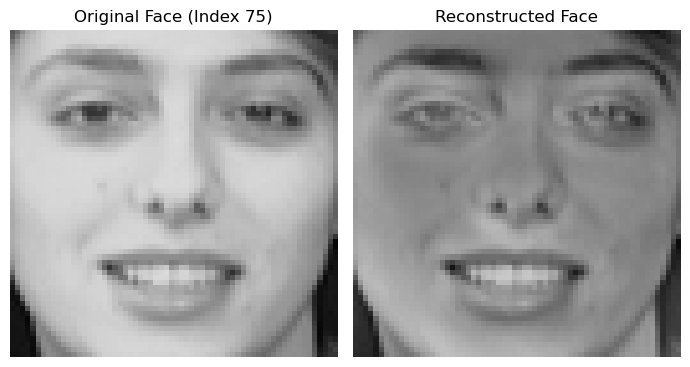

In [348]:

# Visualization
plt.figure(figsize=(7, 4))

# Plot the original face
plt.subplot(1, 2, 1)
title=f'Original Face (Index {student_id})'
visualise(original_face,title,False)

# Plot the reconstructed face
plt.subplot(1, 2, 2)
title= 'Reconstructed Face'
visualise(recreated_face, title,False)

plt.tight_layout()
plt.show()


In [351]:
def check_goodness_fit(original_face,recreated_face):
    error = np.linalg.norm(original_face - recreated_face)
    return error

In [350]:
error = check_goodness_fit(original_face,recreated_face)
print(f'Error between original and reconstructed face: {error:.4f}')

Error between original and reconstructed face: 12.1147


(64, 64)


(-0.5, 63.5, 63.5, -0.5)

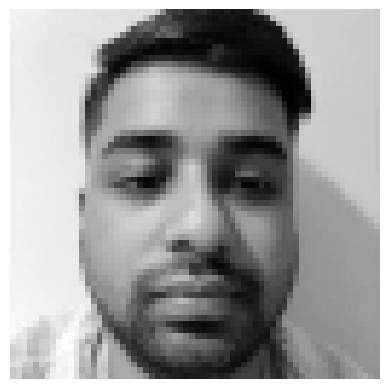

In [349]:
# importing my image 
import os 
image_path = "/Users/shankarbhandari/Desktop/semester assignments/principle of data science/image/"
filename="shankar.pgm"
img_path = os.path.join(image_path, filename) 
image_me = plt.imread(img_path)

print(image_me.shape)
plt.imshow(image_me,cmap=plt.cm.gray)
plt.axis("off")


In [101]:
y_me = P.T@(image_me.reshape(4096,1)-xbar)
#print(y_me)

In [102]:

def reconstruct_face(k):
    first_eigenface = P[:,:k]
    y_me_k = y_me[:k] 
    reconstructed_me = first_eigenface @ y_me_k + xbar
    return reconstructed_me.reshape(64,64)

In [346]:
# k be the different value of eigenvalues greater or equal to 2  and best_fit be the norms list 
K = np.arange(2,5000,10)
best_fit = []
index = 1
for i in K:
    reconstructed_me = reconstruct_face(i)
    best_fit.append(check_goodness_fit(image_me,reconstructed_me))
    # Display reconstructed image


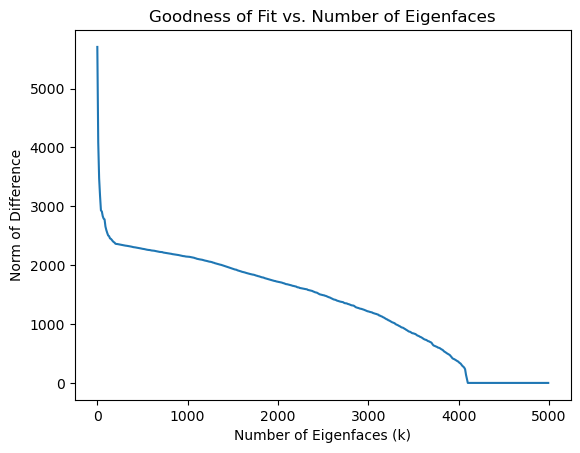

In [347]:
# line graph of goodness of fit
plt.plot(K, best_fit)
plt.xlabel('Number of Eigenfaces (k)')
plt.ylabel('Norm of Difference')
plt.title('Goodness of Fit vs. Number of Eigenfaces')
plt.show()